In [6]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist

In [11]:
(x_train,y_train),(x_test,y_test)=mnist.load_data('digits')

In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
y_train.shape

(60000,)

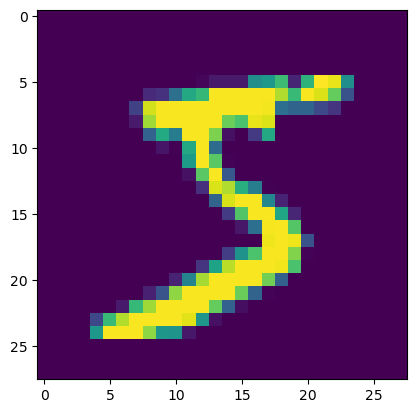

In [15]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

In [16]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

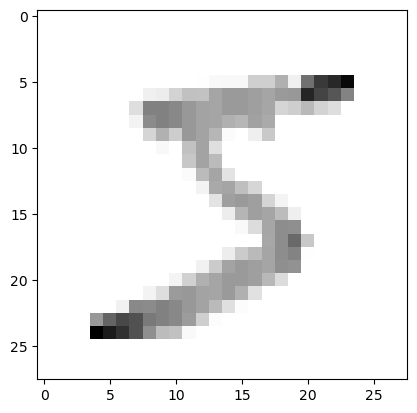

In [17]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [18]:

print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [19]:

print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [20]:
import numpy as np
i=28
x_trainr=np.array(x_train).reshape(-1,i,i,1)
x_testr=np.array(x_test).reshape(-1,i,i,1)
print("Training Samples Dimension",x_trainr.shape)
print("Testing Samples Dimension",x_testr.shape)

Training Samples Dimension (60000, 28, 28, 1)
Testing Samples Dimension (10000, 28, 28, 1)


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [22]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))
     

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

In [24]:
print("Total Training Samples=",len(x_trainr))

Total Training Samples= 60000


In [25]:
from keras.api._v2.keras import metrics
model.compile(loss= "sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [26]:

hist=model.fit(x_trainr,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 30s 18ms/step - loss: 0.2146 - accuracy: 0.9335 - val_loss: 0.0885 - val_accuracy: 0.9714
Epoch 2/10
1500/1500 [==============================] - 26s 18ms/step - loss: 0.0733 - accuracy: 0.9775 - val_loss: 0.0608 - val_accuracy: 0.9834
Epoch 3/10
1500/1500 [==============================] - 26s 18ms/step - loss: 0.0503 - accuracy: 0.9844 - val_loss: 0.0486 - val_accuracy: 0.9856
Epoch 4/10
1500/1500 [==============================] - 26s 18ms/step - loss: 0.0377 - accuracy: 0.9882 - val_loss: 0.0483 - val_accuracy: 0.9843
Epoch 5/10
1500/1500 [==============================] - 26s 18ms/step - loss: 0.0283 - accuracy: 0.9903 - val_loss: 0.0492 - val_accuracy: 0.9869
Epoch 6/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0217 - accuracy: 0.9927 - val_loss: 0.0484 - val_accuracy: 0.9871
Epoch 7/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0180 - accuracy: 0.9943 - val_loss: 0.0420 -

In [27]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:

hist.history

{'loss': [0.2146245390176773,
  0.07331672310829163,
  0.05030978471040726,
  0.037690673023462296,
  0.028309082612395287,
  0.02169562317430973,
  0.018009690567851067,
  0.014189480803906918,
  0.011219399981200695,
  0.009715746156871319],
 'accuracy': [0.9334999918937683,
  0.9774791598320007,
  0.9843958616256714,
  0.9882291555404663,
  0.9903333187103271,
  0.9926875233650208,
  0.9942708611488342,
  0.995395839214325,
  0.9961249828338623,
  0.9968541860580444],
 'val_loss': [0.0885368138551712,
  0.06075412407517433,
  0.048587895929813385,
  0.04828888550400734,
  0.04918264225125313,
  0.04843692481517792,
  0.042048197239637375,
  0.05244407802820206,
  0.04996824264526367,
  0.04290195554494858],
 'val_accuracy': [0.9714166522026062,
  0.9834166765213013,
  0.9855833053588867,
  0.984333336353302,
  0.9869166612625122,
  0.9870833158493042,
  0.9884166717529297,
  0.9860000014305115,
  0.9879166483879089,
  0.9903333187103271]}

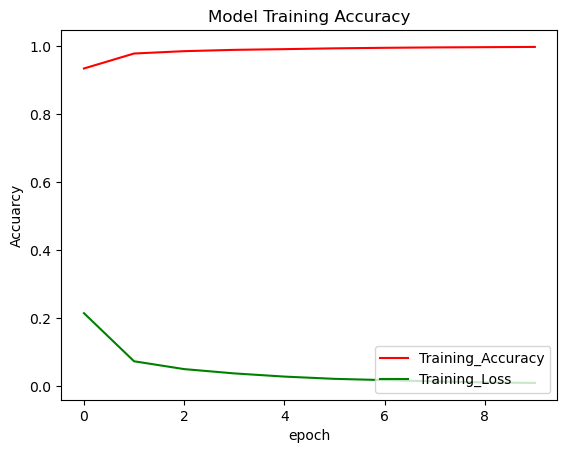

In [30]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'],'-r',label='Training_Accuracy')
plt.plot(hist.history['loss'],'-g',label='Training_Loss')

plt.title('Model Training Accuracy')
plt.ylabel('Accuarcy')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()